Метод сопряженных направлений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]]) 
c = 0.0

In [3]:
# функция, для которой мы ищем минимум
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

In [4]:
# zs - значения фукции
# x1, x2  - аргументы


def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, linewidth=0)
    fig.show()
    return x1, x2, zs

c:\users\mike\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


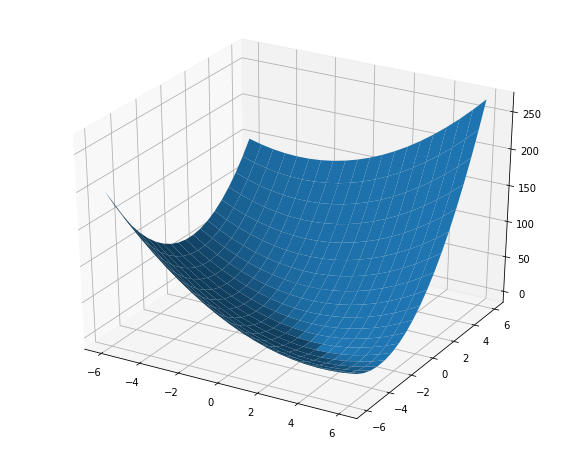

In [5]:
x1, x2, zs = bowl(A, b, c)

In [6]:
# функция, которая отрисовывает линии уровня
# если аругмент steps - отсутствует - просто линии уровня
# иначе - 

def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()

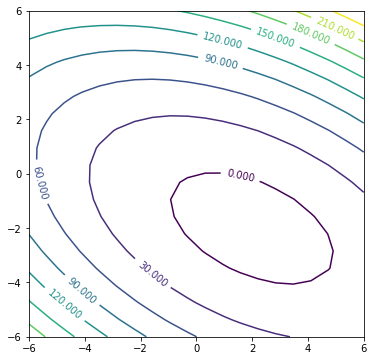

In [7]:
contoursteps(x1, x2, zs)

In [8]:
# задаем параметры и получаем итеративно значения точек для поиска минимума функции 

x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10000
eps = 0.01
alpha = 0.12  
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  
    r = b - A * x
    delta = r.T * r
    i += 1

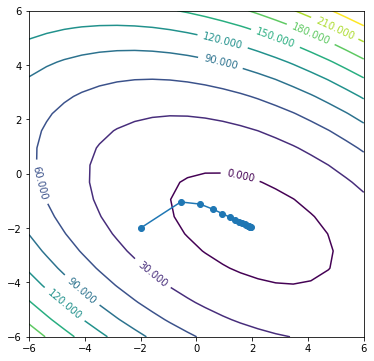

In [9]:
contoursteps(x1, x2, zs, steps)

In [10]:
# тоже самое, но с другими параметрами imax
x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    #beta = -float((r.T * A * d) / float(d.T * A * d))
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1

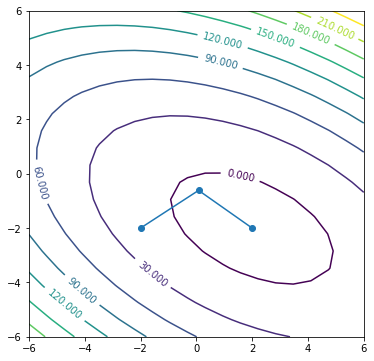

In [11]:
contoursteps(x1, x2, zs, steps)
